In [12]:
## codec repo
import pandas as pd

df = pd.read_csv('info-codec.csv')
df.head()

,file name,commit massage,commit hash,author name,committer date,number of changed files for commit,old file path,new file path,complexity,nloc,readability before commit,readability after commit,change in readability
0,Base64Test.java,Removed unused local variable.\n\n\ngit-svn-id...,941f00ce535e98f4f45ba838ed92795f7a615508,Gary D. Gregory,2003-05-06 20:45:16+00:00,1,src/test/org/apache/commons/codec/binary/Base6...,src/test/org/apache/commons/codec/binary/Base6...,22,315,0.508406,0.499351,-0.009055
1,Base64.java,Javadoc clean up such that the class descripti...,0e0d47592c8ce9aac136d336c8ac931a06fd6feb,Gary D. Gregory,2003-05-06 20:52:18+00:00,1,src/java/org/apache/commons/codec/binary/Base6...,src/java/org/apache/commons/codec/binary/Base6...,55,296,0.814254,0.808989,-0.005265
2,RefinedSoundex.java,Make URL references into @see links which are ...,282192ceff92d8a71b57e6d6cb75664fbaf412ab,Gary D. Gregory,2003-05-12 17:09:38+00:00,2,src/java/org/apache/commons/codec/language/Ref...,src/java/org/apache/commons/codec/language/Ref...,13,58,0.869659,0.869659,0.000000
3,Soundex.java,Make URL references into @see links which are ...,282192ceff92d8a71b57e6d6cb75664fbaf412ab,Gary D. Gregory,2003-05-12 17:09:38+00:00,2,src/java/org/apache/commons/codec/language/Sou...,src/java/org/apache/commons/codec/language/Sou...,17,63,0.859886,0.859886,0.000000
4,RefinedSoundex.java,Javadocs were swicthed.\n\n\ngit-svn-id: https...,4f10ae2edef970df9f189754e88d7f92f1b536e1,Gary D. Gregory,2003-05-12 17:17:24+00:00,2,src/java/org/apache/commons/codec/language/Ref...,src/java/org/apache/commons/codec/language/Ref...,13,58,0.869659,0.869659,0.000000


In [14]:
import pandas as pd
from scipy.stats import ttest_rel

df_without_nan = df.dropna()

# Extract the two columns of interest
column1 = df_without_nan['readability after commit']

column2 = df_without_nan['readability before commit']

# Perform the paired t-test using Scipy
t_statistic, p_value = ttest_rel(column1, column2)

# Print the results
print("T-Statistic:", t_statistic)
print("P-Value:", p_value)

T-Statistic: -0.4241634955244952
P-Value: 0.671469494077538


In [162]:
# Preprocess commit messages
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer

# nltk.download('stopwords')
# nltk.download('punkt')

# Define function to clean and preprocess text
def preprocess_text(text):
    # Convert to lowercase and remove non-alphabetic characters
    text = re.sub(r'\bC\b|[^a-zA-Z]', ' ', text.lower())
    # text = re.sub('[^a-zA-Z]', ' ', text.lower())
    
    # Tokenize text and remove stop words
    stop_words = set(stopwords.words('english'))
    tokens = word_tokenize(text)
    filtered_tokens = [token for token in tokens if token not in stop_words]
    
    # Stem tokens
    ps = PorterStemmer()
    stemmed_tokens = [ps.stem(token) for token in filtered_tokens]
    
    # Combine tokens into cleaned text
    cleaned_text = ' '.join(stemmed_tokens)
    
    return cleaned_text

# Apply preprocessing function to commit messages
df['commit massage'] = df['commit massage'].apply(preprocess_text)

In [163]:
df_increased = df[df['change in readability'] > 0]
df_decreased = df[df['change in readability'] < 0]

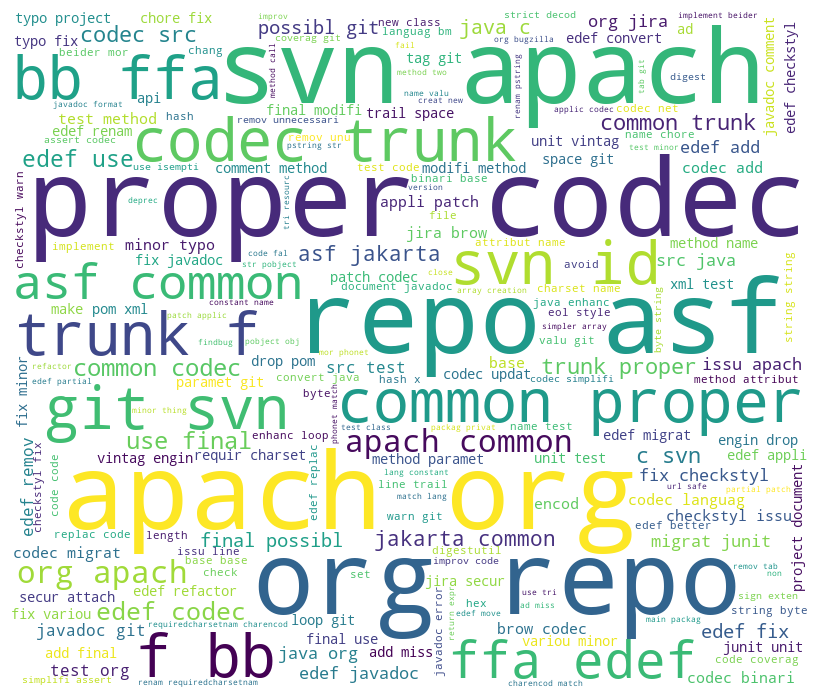

In [164]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Create a Wordcloud for commits where readability has improved
text_increased = ' '.join(df_increased['commit massage'])
wordcloud_increased = WordCloud(width = 800, height = 680, background_color ='white').generate(text_increased)
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud_increased)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()

C:\Users\Dell\AppData\Local\Temp\ipykernel_2252\1700087875.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_increased['tokens'] = df_increased['commit massage'].apply(lambda x: word_tokenize(str(x)))


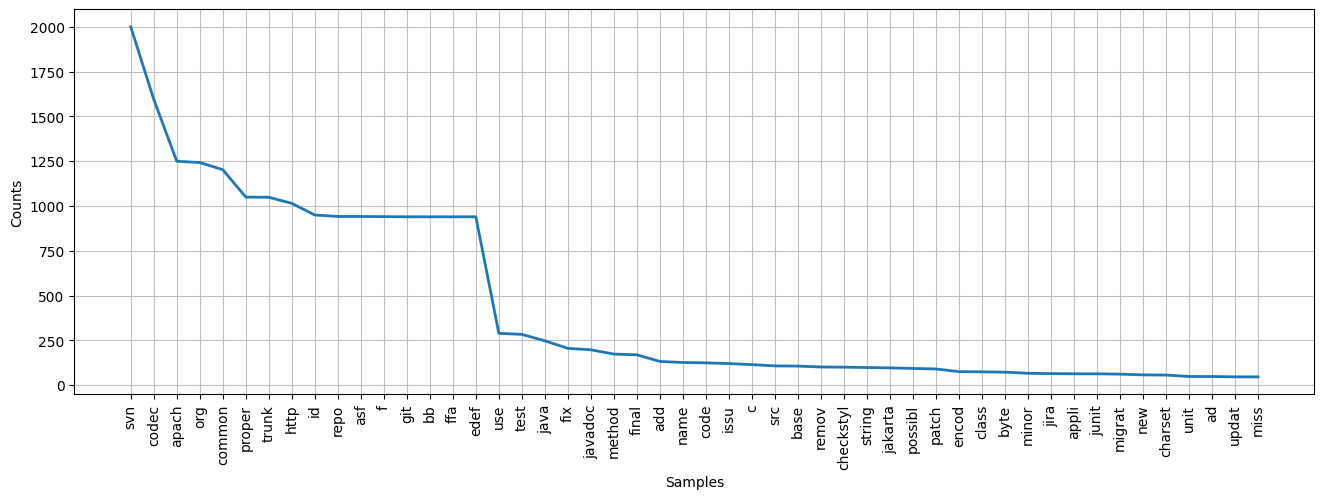

In [167]:
from nltk.probability import FreqDist
# nltk.download('punkt')
from nltk.tokenize import word_tokenize
df_increased['tokens'] = df_increased['commit massage'].apply(lambda x: word_tokenize(str(x)))
tokens = []
for sublist in df_increased['tokens']:
    for token in sublist:
        tokens.append(token)
fdist = FreqDist(tokens)

import matplotlib.pyplot as plt

plt.figure(figsize=(16,5))
fdist.plot(50, cumulative=False)
plt.show()

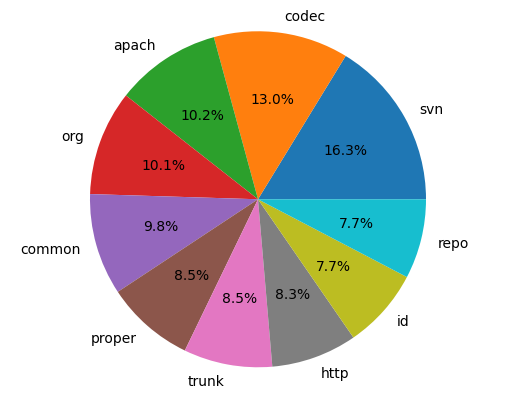

In [168]:
n = 10  # Number of top words to plot

top_words = fdist.most_common(n)
labels, values = zip(*top_words)

import matplotlib.pyplot as plt

plt.pie(values, labels=labels, autopct='%1.1f%%')
plt.axis('equal')
plt.show()

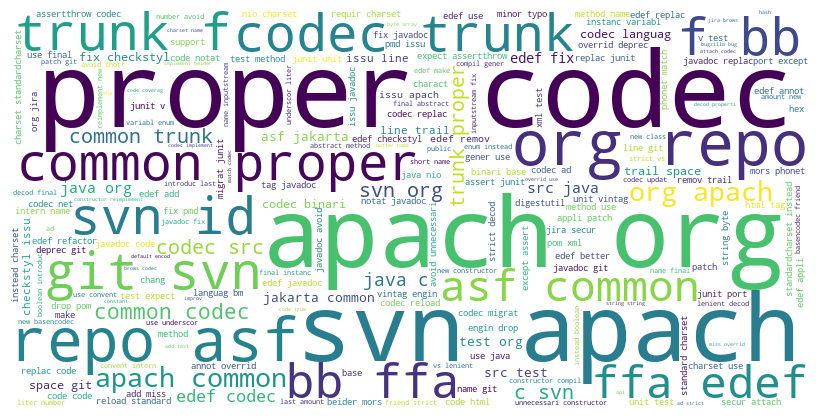

In [137]:
# Create a Wordcloud for commits where readability has decreased
text_decreased = ' '.join(df_decreased['commit massage'])
wordcloud_decreased = WordCloud(width = 800, height = 400, background_color ='white').generate(text_decreased)
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud_decreased)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()

C:\Users\Dell\AppData\Local\Temp\ipykernel_2252\576119718.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_decreased['tokens'] = df_decreased['commit massage'].apply(lambda x: word_tokenize(str(x)))


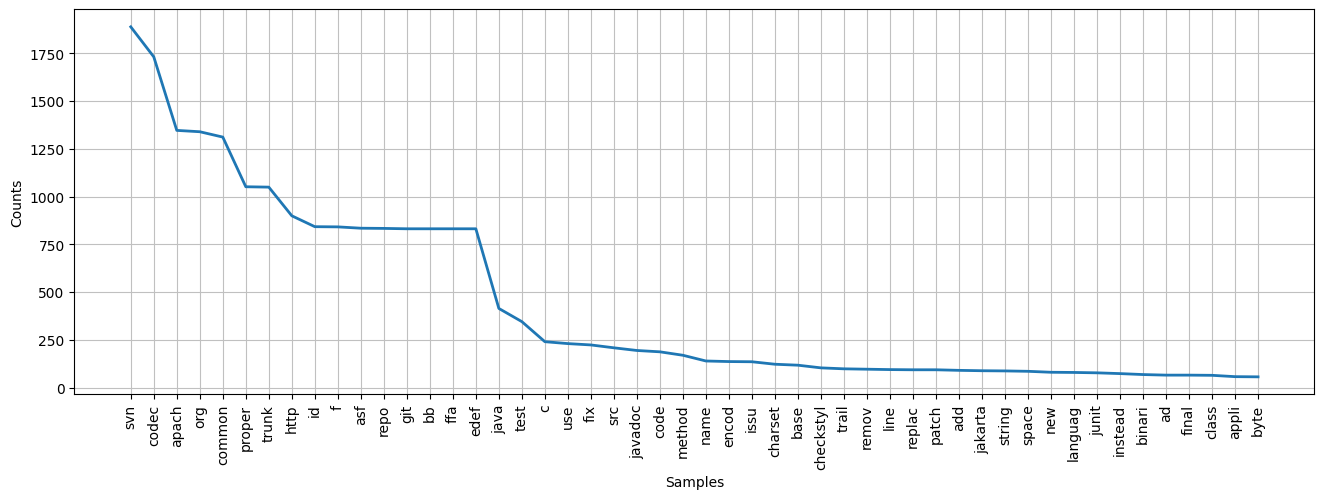

In [169]:
from nltk.probability import FreqDist
# nltk.download('punkt')
from nltk.tokenize import word_tokenize
df_decreased['tokens'] = df_decreased['commit massage'].apply(lambda x: word_tokenize(str(x)))
tokens = []
for sublist in df_decreased['tokens']:
    for token in sublist:
        tokens.append(token)
fdist = FreqDist(tokens)

import matplotlib.pyplot as plt

plt.figure(figsize=(16,5))
fdist.plot(50, cumulative=False)
plt.show()

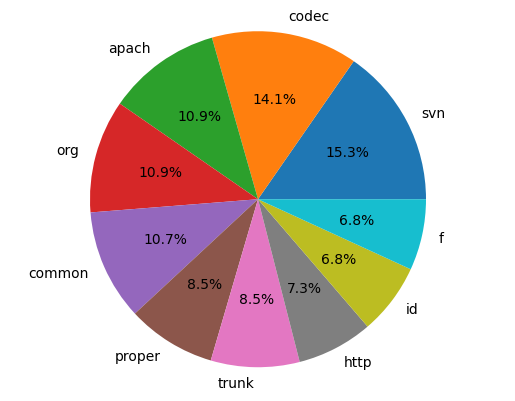

In [170]:
n = 10  # Number of top words to plot

top_words = fdist.most_common(n)
labels, values = zip(*top_words)

import matplotlib.pyplot as plt

plt.pie(values, labels=labels, autopct='%1.1f%%')
plt.axis('equal')
plt.show()

In [171]:
from sklearn.model_selection import train_test_split

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [172]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Vectorize the preprocessed commit messages
vectorizer = TfidfVectorizer()
X_train_vect = vectorizer.fit_transform(X_train)
X_test_vect = vectorizer.transform(X_test)

In [173]:
from sklearn.ensemble import RandomForestClassifier

# Train Random Forest model
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train_vect, y_train)

RandomForestClassifier(random_state=42)

In [174]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Make predictions on the testing set
y_pred = rf.predict(X_test_vect)

# Evaluate the model's performance on the testing set
print('Accuracy:', accuracy_score(y_test, y_pred))
print('Classification Report:')
print(classification_report(y_test, y_pred))
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.8280922431865828
Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.67      0.67       990
           1       0.89      0.88      0.88      2826

    accuracy                           0.83      3816
   macro avg       0.78      0.78      0.78      3816
weighted avg       0.83      0.83      0.83      3816

Confusion Matrix:
[[ 666  324]
 [ 332 2494]]


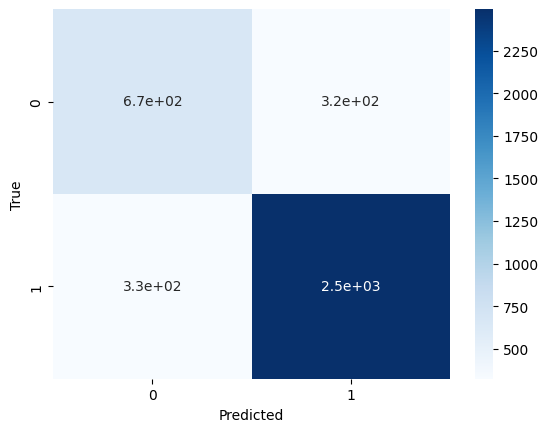

In [175]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create heatmap visualization of confusion matrix
sns.heatmap(cm, annot=True, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [1]:
## codec bcel
import pandas as pd

df = pd.read_csv('info-bcel.csv')
df.head()

,file name,commit massage,commit hash,author name,committer date,number of changed files for commit,old file path,new file path,complexity,nloc,readability before commit,readability after commit,change in readability
0,Attribute.java,Unknown (non-standard) attributes may be read ...,155734b961e36d08a3eafea830305cec780ec14d,Markus Dahm,2001-11-20 11:41:05+00:00,2,src/java/org/apache/bcel/classfile/Attribute.java,src/java/org/apache/bcel/classfile/Attribute.java,31,110,0.928452,0.925392,-3.059969e-03
1,Pass3bVerifier.java,"Improved a comment, mainly to see if CVS write...",2bd26ca1099e08153cb7c99bfb9091e78a031ef2,Enver Haase,2001-11-28 07:45:40+00:00,1,src/java/org/apache/bcel/verifier/structurals/...,src/java/org/apache/bcel/verifier/structurals/...,49,199,0.741829,0.741829,2.490000e-08
2,ClassLoader.java,Check clazz for null pointer first\n\n\ngit-sv...,81c3c69c50f9e1601fd62067b53626d7a3768315,Markus Dahm,2001-12-14 18:31:18+00:00,1,src/java/org/apache/bcel/util/ClassLoader.java,src/java/org/apache/bcel/util/ClassLoader.java,14,78,0.884869,0.885160,2.910730e-04
3,ClassPath.java,Allow lookup through getResourceAsStream()\n\n...,378638269ebbf81f751aea817b14239fe09d4fb0,Markus Dahm,2001-12-14 18:31:58+00:00,1,src/java/org/apache/bcel/util/ClassPath.java,src/java/org/apache/bcel/util/ClassPath.java,40,162,0.823976,0.823936,-4.010000e-05
4,LocalVariableGen.java,For local variables whose scope end at the las...,24a5aa6b09149f293dd20d0d8bf23068dc3352cd,Markus Dahm,2001-12-14 18:32:54+00:00,1,src/java/org/apache/bcel/generic/LocalVariable...,src/java/org/apache/bcel/generic/LocalVariable...,28,79,0.880927,0.877801,-3.125931e-03


In [2]:
# Preprocess commit messages
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer

# nltk.download('stopwords')
# nltk.download('punkt')

# Define function to clean and preprocess text
def preprocess_text(text):
    # Convert to lowercase and remove non-alphabetic characters
    text = re.sub(r'\bC\b|[^a-zA-Z]', ' ', text.lower())
    # text = re.sub('[^a-zA-Z]', ' ', text.lower())
    
    # Tokenize text and remove stop words
    stop_words = set(stopwords.words('english'))
    tokens = word_tokenize(text)
    filtered_tokens = [token for token in tokens if token not in stop_words]
    
    # Stem tokens
    ps = PorterStemmer()
    stemmed_tokens = [ps.stem(token) for token in filtered_tokens]
    
    # Combine tokens into cleaned text
    cleaned_text = ' '.join(stemmed_tokens)
    
    return cleaned_text

# Apply preprocessing function to commit messages
df['commit massage'] = df['commit massage'].apply(preprocess_text)

In [3]:
df_increased = df[df['change in readability'] > 0]
df_decreased = df[df['change in readability'] < 0]

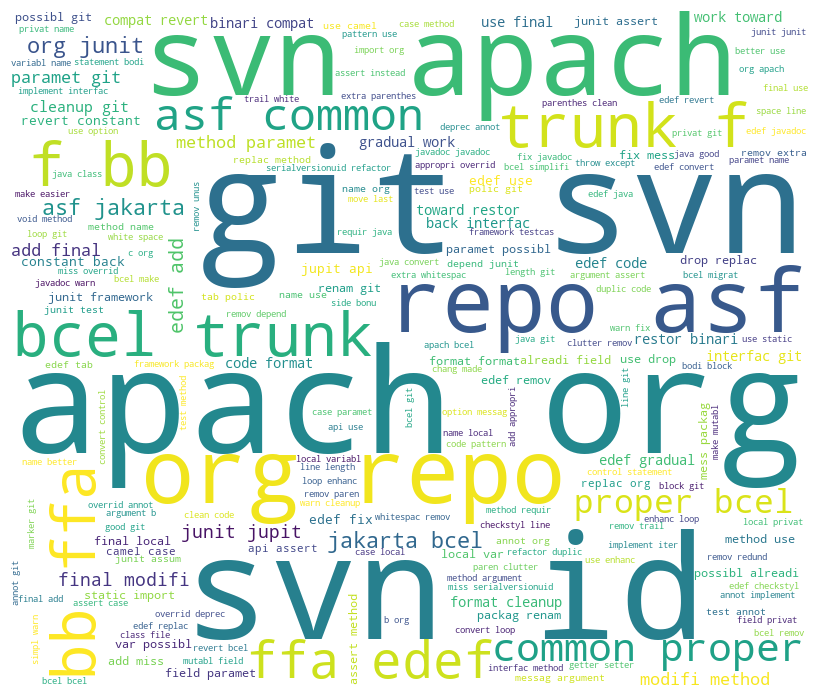

In [4]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Create a Wordcloud for commits where readability has improved
text_increased = ' '.join(df_increased['commit massage'])
wordcloud_increased = WordCloud(width = 800, height = 680, background_color ='white').generate(text_increased)
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud_increased)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()

C:\Users\Dell\AppData\Local\Temp\ipykernel_8792\1700087875.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_increased['tokens'] = df_increased['commit massage'].apply(lambda x: word_tokenize(str(x)))


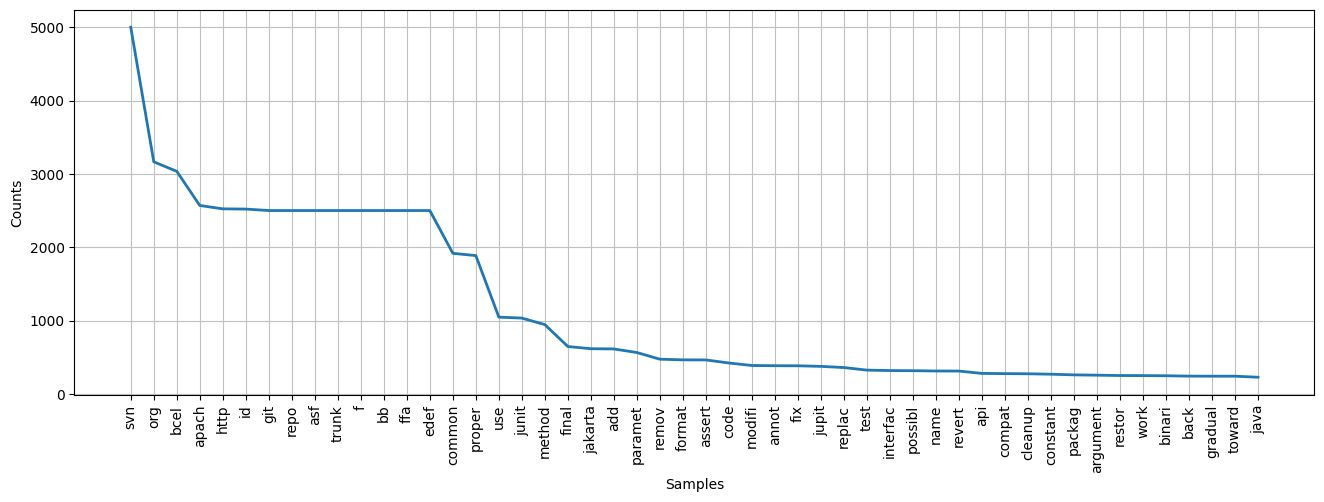

In [5]:
from nltk.probability import FreqDist
# nltk.download('punkt')
from nltk.tokenize import word_tokenize
df_increased['tokens'] = df_increased['commit massage'].apply(lambda x: word_tokenize(str(x)))
tokens = []
for sublist in df_increased['tokens']:
    for token in sublist:
        tokens.append(token)
fdist = FreqDist(tokens)

import matplotlib.pyplot as plt

plt.figure(figsize=(16,5))
fdist.plot(50, cumulative=False)
plt.show()

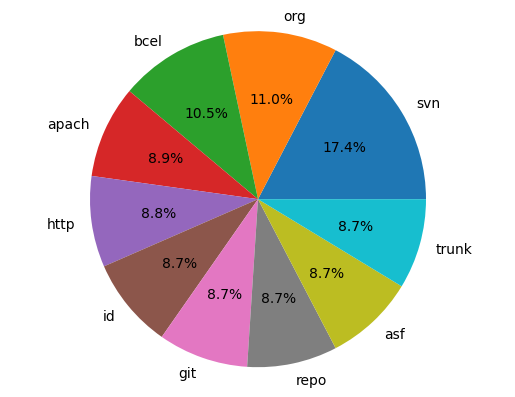

In [6]:
n = 10  # Number of top words to plot

top_words = fdist.most_common(n)
labels, values = zip(*top_words)

import matplotlib.pyplot as plt

plt.pie(values, labels=labels, autopct='%1.1f%%')
plt.axis('equal')
plt.show()

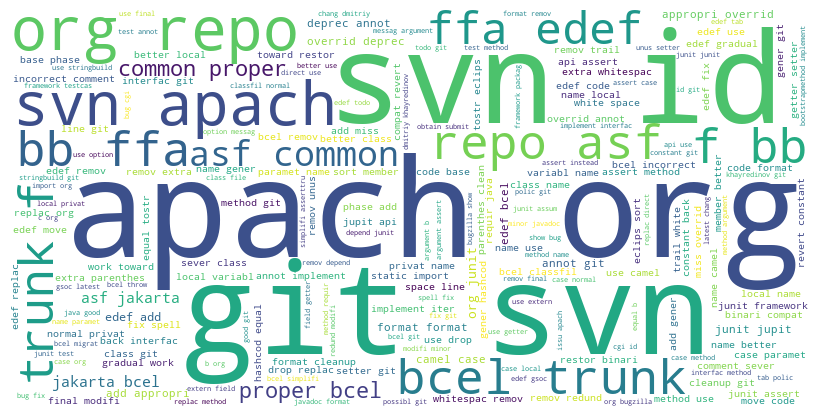

In [7]:
# Create a Wordcloud for commits where readability has decreased
text_decreased = ' '.join(df_decreased['commit massage'])
wordcloud_decreased = WordCloud(width = 800, height = 400, background_color ='white').generate(text_decreased)
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud_decreased)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()

C:\Users\Dell\AppData\Local\Temp\ipykernel_8792\576119718.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_decreased['tokens'] = df_decreased['commit massage'].apply(lambda x: word_tokenize(str(x)))


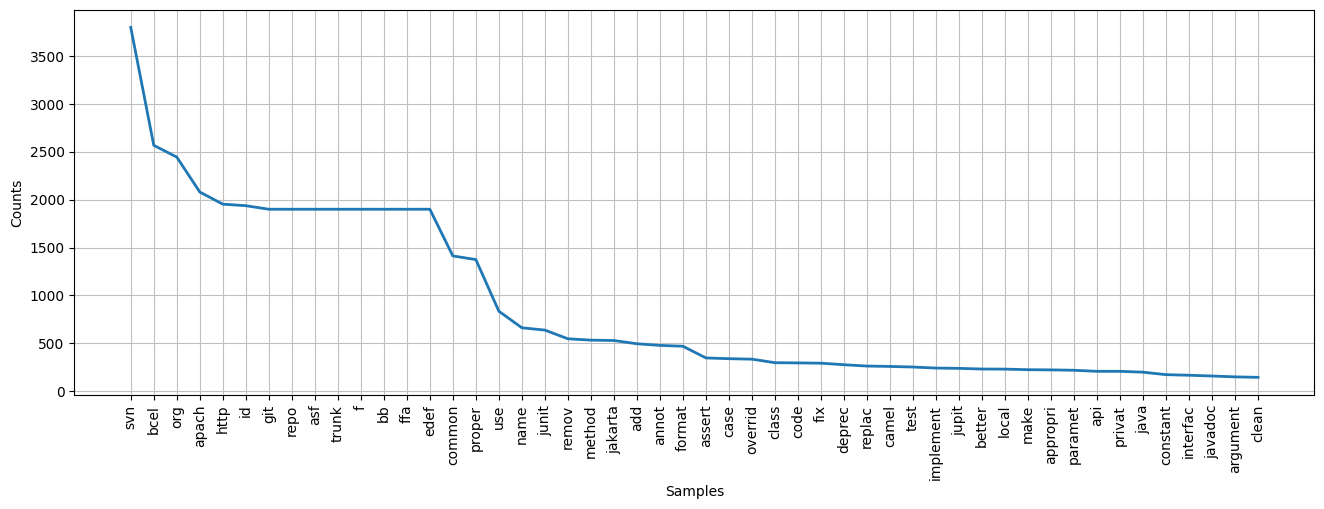

In [8]:
from nltk.probability import FreqDist
# nltk.download('punkt')
from nltk.tokenize import word_tokenize
df_decreased['tokens'] = df_decreased['commit massage'].apply(lambda x: word_tokenize(str(x)))
tokens = []
for sublist in df_decreased['tokens']:
    for token in sublist:
        tokens.append(token)
fdist = FreqDist(tokens)

import matplotlib.pyplot as plt

plt.figure(figsize=(16,5))
fdist.plot(50, cumulative=False)
plt.show()

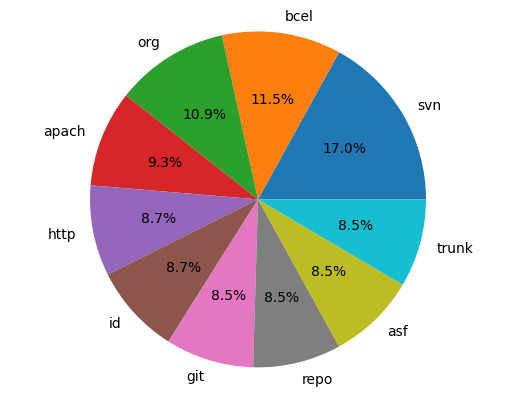

In [9]:
n = 10  # Number of top words to plot

top_words = fdist.most_common(n)
labels, values = zip(*top_words)

import matplotlib.pyplot as plt

plt.pie(values, labels=labels, autopct='%1.1f%%')
plt.axis('equal')
plt.show()

In [10]:
from sklearn.model_selection import train_test_split

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

NameError: name 'X' is not defined

In [188]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Vectorize the preprocessed commit messages
vectorizer = TfidfVectorizer()
X_train_vect = vectorizer.fit_transform(X_train)
X_test_vect = vectorizer.transform(X_test)

In [189]:
from sklearn.ensemble import RandomForestClassifier

# Train Random Forest model
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train_vect, y_train)

RandomForestClassifier(random_state=42)

In [190]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Make predictions on the testing set
y_pred = rf.predict(X_test_vect)

# Evaluate the model's performance on the testing set
print('Accuracy:', accuracy_score(y_test, y_pred))
print('Classification Report:')
print(classification_report(y_test, y_pred))
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.8280922431865828
Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.67      0.67       990
           1       0.89      0.88      0.88      2826

    accuracy                           0.83      3816
   macro avg       0.78      0.78      0.78      3816
weighted avg       0.83      0.83      0.83      3816

Confusion Matrix:
[[ 666  324]
 [ 332 2494]]


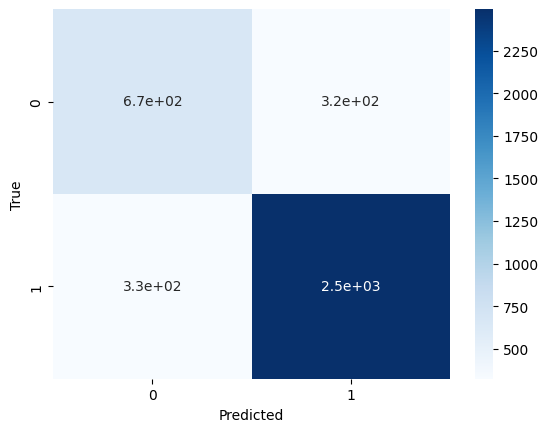

In [191]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create heatmap visualization of confusion matrix
sns.heatmap(cm, annot=True, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [195]:
## info of vfs
import pandas as pd

df = pd.read_csv('info-vfs.csv')
df.head()

,file name,commit massage,commit hash,author name,committer date,number of changed files for commit,old file path,new file path,complexity,nloc,readability before commit,readability after commit,change in readability
0,AbstractFileObject.java,Fixed the various dependencies of the maven bu...,06b8631ddbb9d7cb18df26982f0d41f6324208b7,James Strachan,2002-07-17 10:23:44+00:00,9,src/java/org/apache/commons/vfs/provider/Abstr...,src/java/org/apache/commons/vfs/provider/Abstr...,93,505,0.878303,0.878303,0.000000
1,FtpFileObject.java,Fixed the various dependencies of the maven bu...,06b8631ddbb9d7cb18df26982f0d41f6324208b7,James Strachan,2002-07-17 10:23:44+00:00,9,src/java/org/apache/commons/vfs/provider/ftp/F...,src/java/org/apache/commons/vfs/provider/ftp/F...,31,160,0.840928,0.840928,0.000000
2,FtpFileSystem.java,Fixed the various dependencies of the maven bu...,06b8631ddbb9d7cb18df26982f0d41f6324208b7,James Strachan,2002-07-17 10:23:44+00:00,9,src/java/org/apache/commons/vfs/provider/ftp/F...,src/java/org/apache/commons/vfs/provider/ftp/F...,11,84,0.925186,0.925186,0.000000
3,DefaultLocalFileSystemProvider.java,Fixed the various dependencies of the maven bu...,06b8631ddbb9d7cb18df26982f0d41f6324208b7,James Strachan,2002-07-17 10:23:44+00:00,9,src/java/org/apache/commons/vfs/provider/local...,src/java/org/apache/commons/vfs/provider/local...,7,55,0.860681,0.860681,0.000000
4,DefaultFileReplicator.java,- File replication is now performed as a privi...,07290fa687309539ecb8ee66b5a326ae7623a4e4,adammurdoch,2002-08-20 02:57:02+00:00,16,src/java/org/apache/commons/vfs/impl/DefaultFi...,src/java/org/apache/commons/vfs/impl/DefaultFi...,6,76,0.799574,0.863718,0.064144


In [196]:
# Preprocess commit messages
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer

# nltk.download('stopwords')
# nltk.download('punkt')

# Define function to clean and preprocess text
def preprocess_text(text):
    # Convert to lowercase and remove non-alphabetic characters
    text = re.sub(r'\bC\b|[^a-zA-Z]', ' ', text.lower())
    # text = re.sub('[^a-zA-Z]', ' ', text.lower())
    
    # Tokenize text and remove stop words
    stop_words = set(stopwords.words('english'))
    tokens = word_tokenize(text)
    filtered_tokens = [token for token in tokens if token not in stop_words]
    
    # Stem tokens
    ps = PorterStemmer()
    stemmed_tokens = [ps.stem(token) for token in filtered_tokens]
    
    # Combine tokens into cleaned text
    cleaned_text = ' '.join(stemmed_tokens)
    
    return cleaned_text

# Apply preprocessing function to commit messages
df['commit massage'] = df['commit massage'].apply(preprocess_text)

In [197]:
df_increased = df[df['change in readability'] > 0]
df_decreased = df[df['change in readability'] < 0]

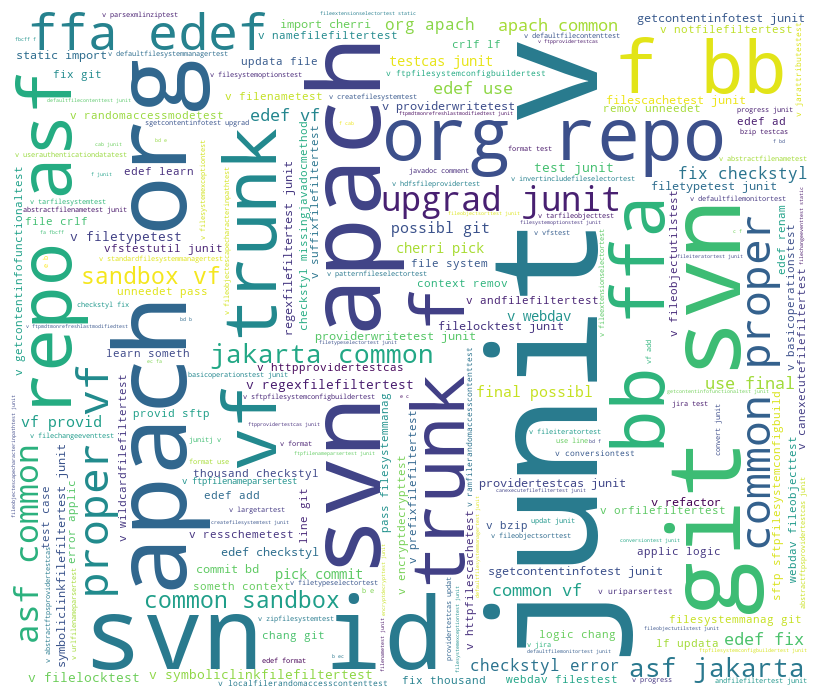

In [198]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Create a Wordcloud for commits where readability has improved
text_increased = ' '.join(df_increased['commit massage'])
wordcloud_increased = WordCloud(width = 800, height = 680, background_color ='white').generate(text_increased)
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud_increased)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()

C:\Users\Dell\AppData\Local\Temp\ipykernel_2252\1700087875.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_increased['tokens'] = df_increased['commit massage'].apply(lambda x: word_tokenize(str(x)))


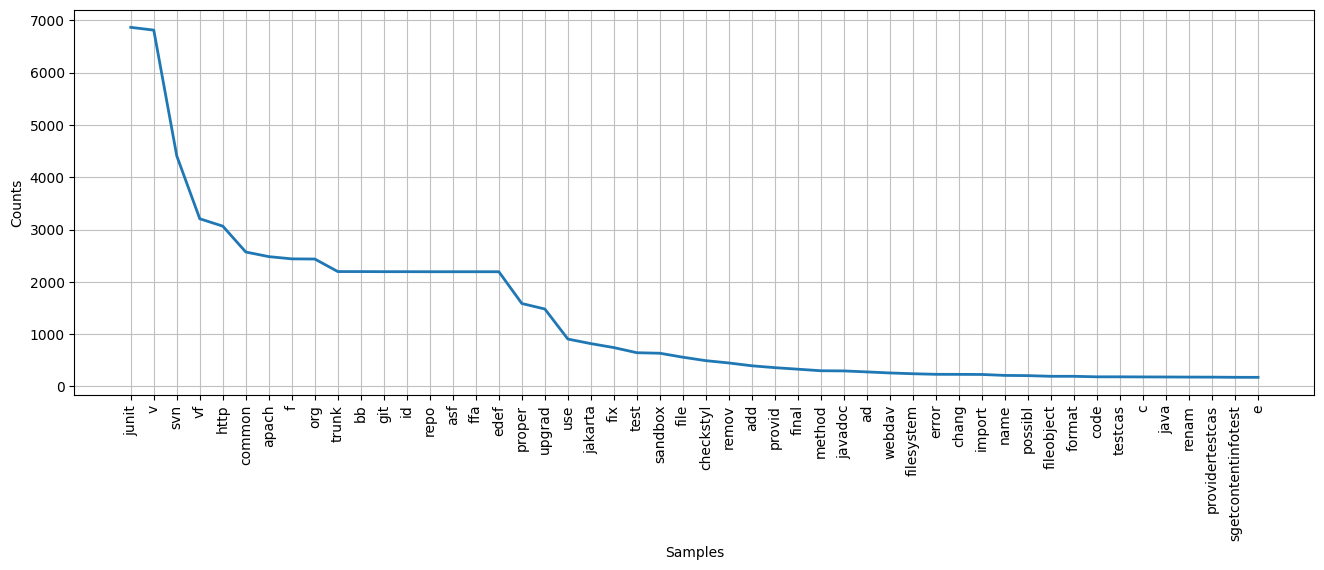

In [199]:
from nltk.probability import FreqDist
# nltk.download('punkt')
from nltk.tokenize import word_tokenize
df_increased['tokens'] = df_increased['commit massage'].apply(lambda x: word_tokenize(str(x)))
tokens = []
for sublist in df_increased['tokens']:
    for token in sublist:
        tokens.append(token)
fdist = FreqDist(tokens)

import matplotlib.pyplot as plt

plt.figure(figsize=(16,5))
fdist.plot(50, cumulative=False)
plt.show()

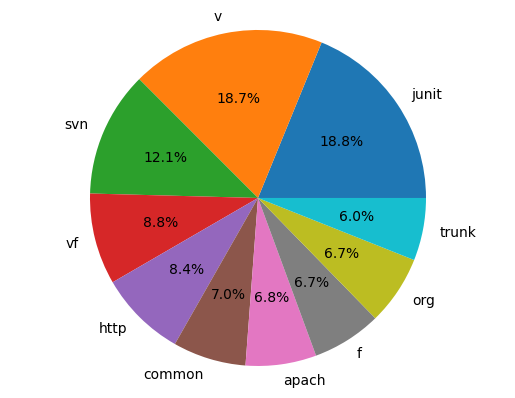

In [200]:
n = 10  # Number of top words to plot

top_words = fdist.most_common(n)
labels, values = zip(*top_words)

import matplotlib.pyplot as plt

plt.pie(values, labels=labels, autopct='%1.1f%%')
plt.axis('equal')
plt.show()

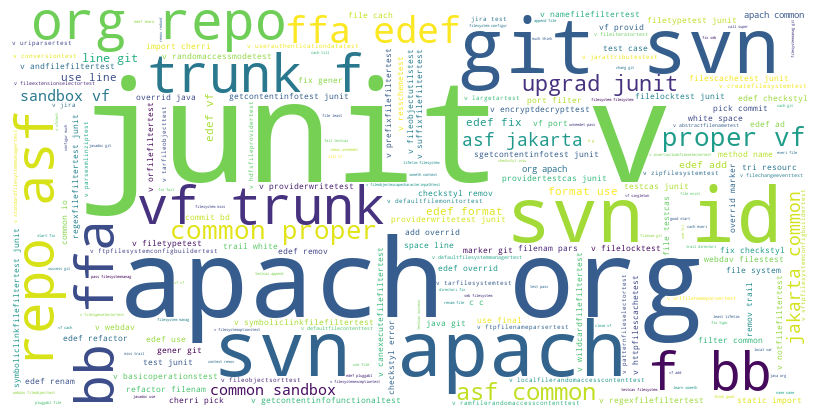

In [201]:
# Create a Wordcloud for commits where readability has decreased
text_decreased = ' '.join(df_decreased['commit massage'])
wordcloud_decreased = WordCloud(width = 800, height = 400, background_color ='white').generate(text_decreased)
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud_decreased)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()

C:\Users\Dell\AppData\Local\Temp\ipykernel_2252\576119718.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_decreased['tokens'] = df_decreased['commit massage'].apply(lambda x: word_tokenize(str(x)))


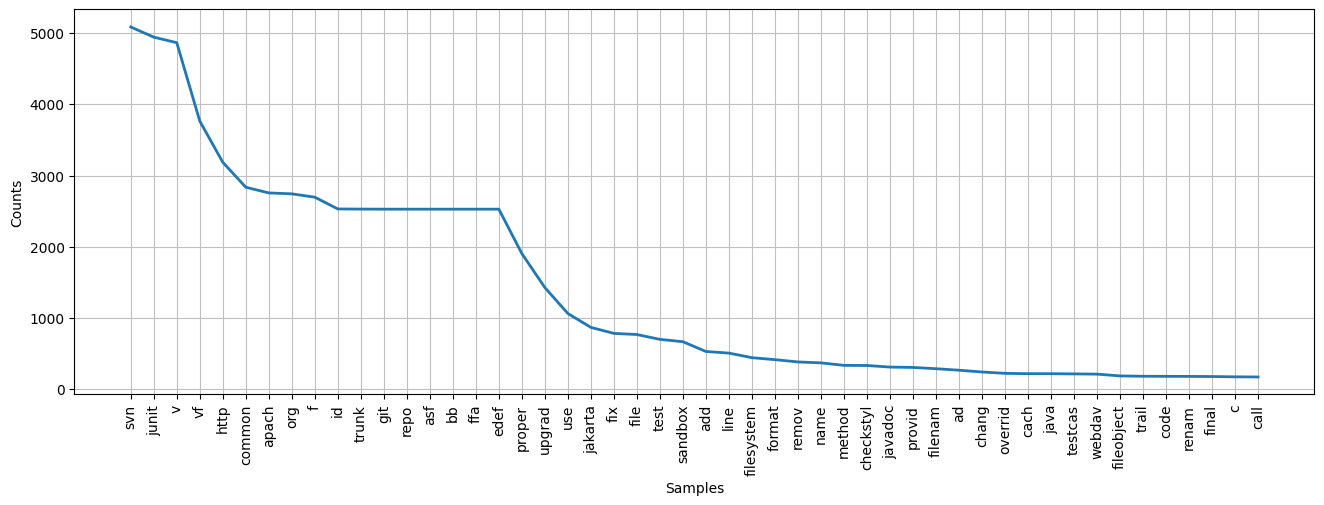

In [202]:
from nltk.probability import FreqDist
# nltk.download('punkt')
from nltk.tokenize import word_tokenize
df_decreased['tokens'] = df_decreased['commit massage'].apply(lambda x: word_tokenize(str(x)))
tokens = []
for sublist in df_decreased['tokens']:
    for token in sublist:
        tokens.append(token)
fdist = FreqDist(tokens)

import matplotlib.pyplot as plt

plt.figure(figsize=(16,5))
fdist.plot(50, cumulative=False)
plt.show()

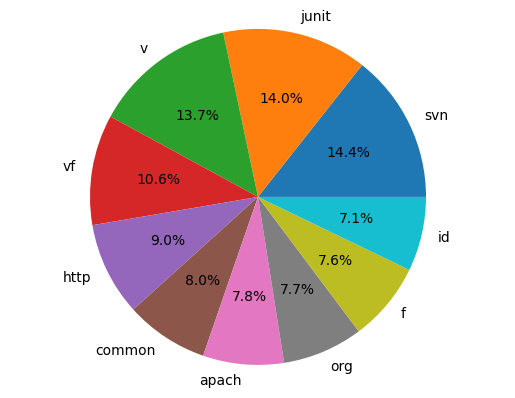

In [203]:
n = 10  # Number of top words to plot

top_words = fdist.most_common(n)
labels, values = zip(*top_words)

import matplotlib.pyplot as plt

plt.pie(values, labels=labels, autopct='%1.1f%%')
plt.axis('equal')
plt.show()

In [204]:
from sklearn.model_selection import train_test_split

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [205]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Vectorize the preprocessed commit messages
vectorizer = TfidfVectorizer()
X_train_vect = vectorizer.fit_transform(X_train)
X_test_vect = vectorizer.transform(X_test)

In [206]:
from sklearn.ensemble import RandomForestClassifier

# Train Random Forest model
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train_vect, y_train)

RandomForestClassifier(random_state=42)

In [207]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Make predictions on the testing set
y_pred = rf.predict(X_test_vect)

# Evaluate the model's performance on the testing set
print('Accuracy:', accuracy_score(y_test, y_pred))
print('Classification Report:')
print(classification_report(y_test, y_pred))
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.8280922431865828
Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.67      0.67       990
           1       0.89      0.88      0.88      2826

    accuracy                           0.83      3816
   macro avg       0.78      0.78      0.78      3816
weighted avg       0.83      0.83      0.83      3816

Confusion Matrix:
[[ 666  324]
 [ 332 2494]]


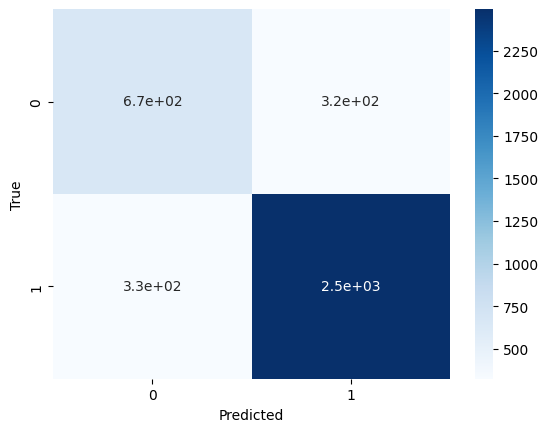

In [208]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create heatmap visualization of confusion matrix
sns.heatmap(cm, annot=True, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()